# Regularisation_2023

### Overfitting

6.png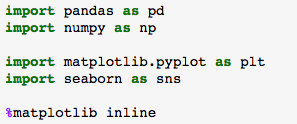

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# We take a random point on the sine and add noise to it. 
# Sine is the objective function. 
# In this case, the feature is x-coordinate.
# Write data generation function

7.png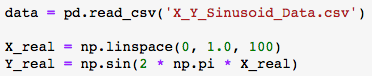

In [2]:
data = pd.read_csv('X_Y_Sinusoid_Data.csv')
X_real = np.linspace(0, 0.1, 100)
Y_real = np.sin(2*np.pi*X_real)

8.png

In [3]:
data.head()

,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


9.png

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       20 non-null     float64
 1   y       20 non-null     float64
dtypes: float64(2)
memory usage: 452.0 bytes


10.png

In [4]:
X_real[:5]

array([0.       , 0.0010101, 0.0020202, 0.0030303, 0.0040404])

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404])

11.png

In [5]:
Y_real[:5]

array([0.        , 0.00634661, 0.01269296, 0.01903881, 0.02538388])

array([0.        , 0.06342392, 0.12659245, 0.18925124, 0.25114799])

12.png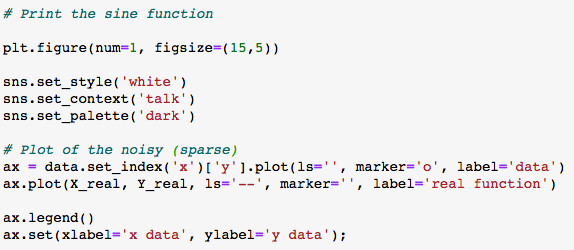

[Text(0.5, 0, 'x data'), Text(0, 0.5, 'y data')]

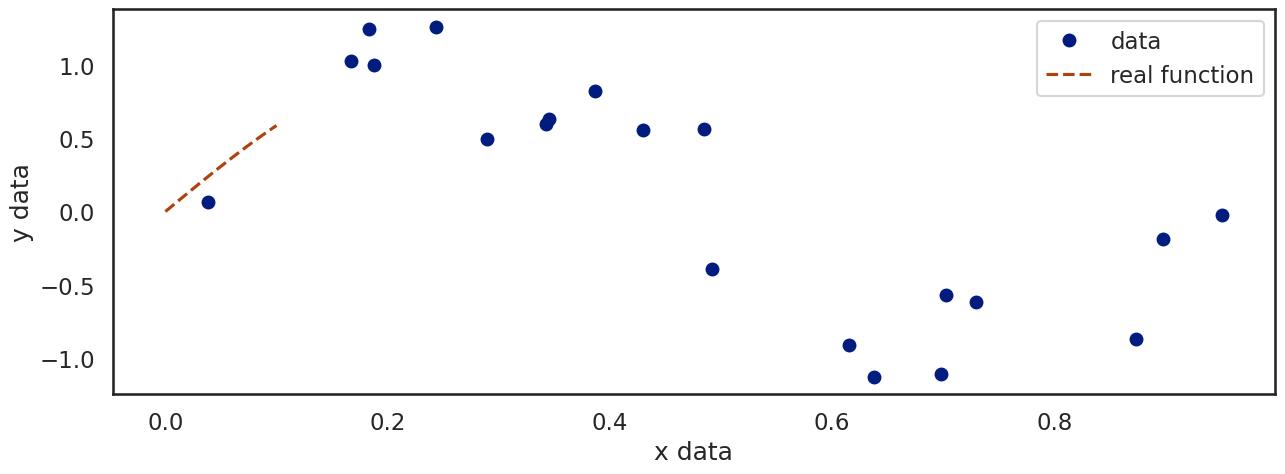

In [8]:
plt.figure(num=1, figsize=(15, 5))

sns.set_style("white")
sns.set_context('talk')
sns.set_palette('dark')

ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')


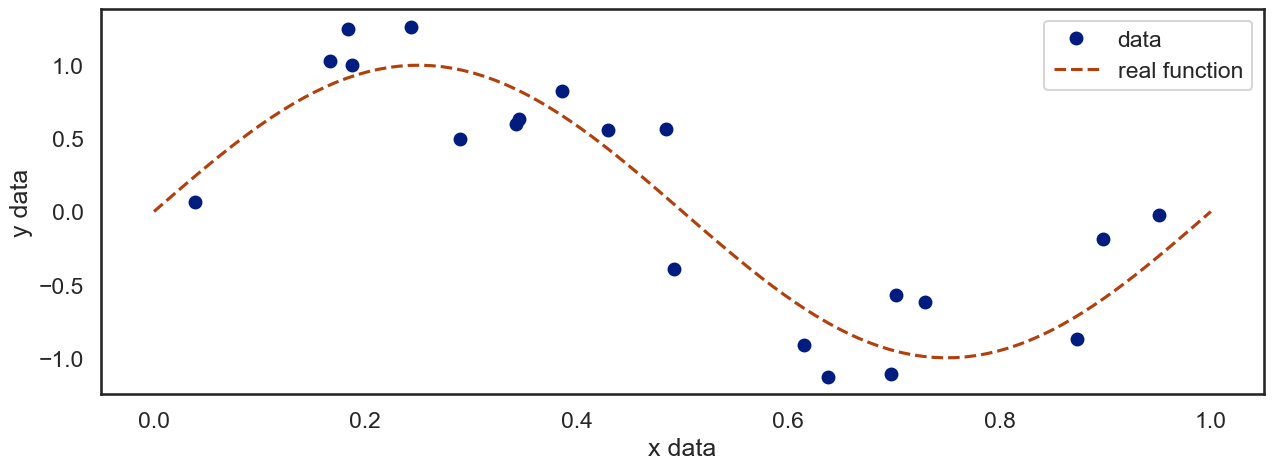

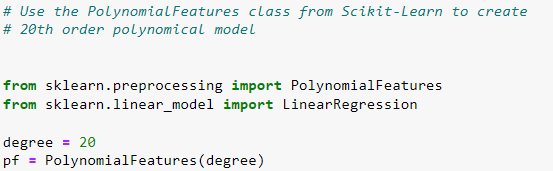

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degree = 20
pf = PolynomialFeatures(degree)

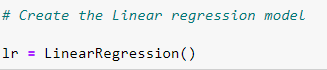

In [14]:
lr = LinearRegression()

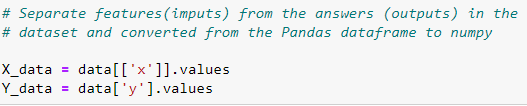

In [15]:
X_data = data[['x']].values
Y_data = data[['y']].values

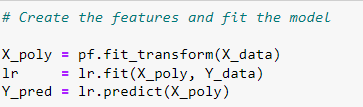

In [16]:
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

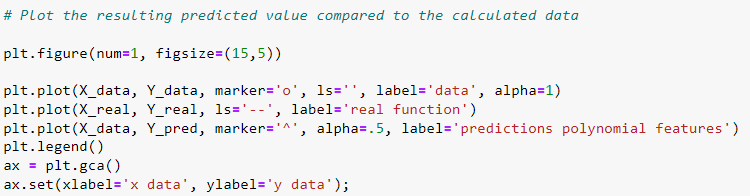

TypeError: alpha must be numeric or None, not <class 'str'>

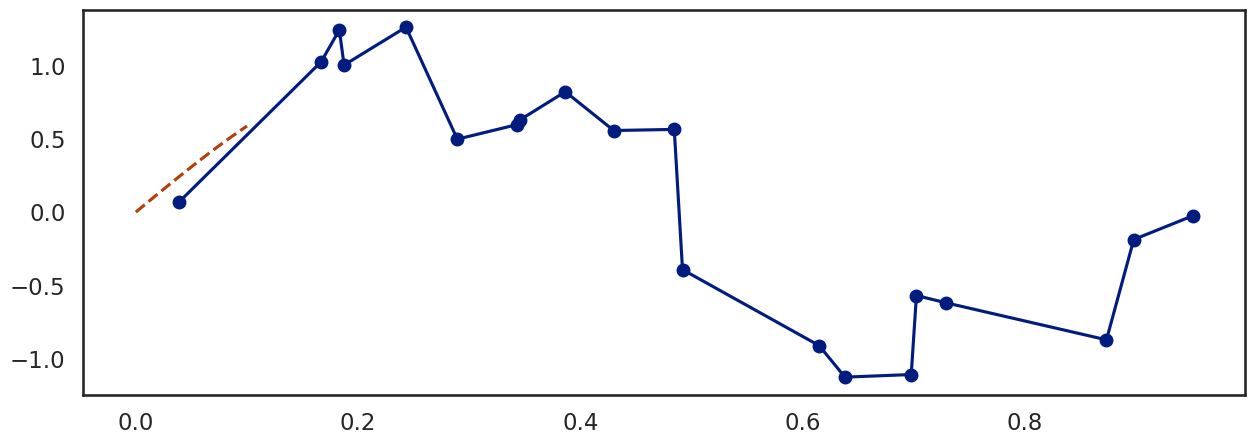

In [17]:
plt.figure(num=1, figsize=(15, 5))

plt.plot(X_data, Y_data, marker='o', label='Data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function',)
plt.plot(X_data, Y_pred, marker='^', alpha='0.5', label='predictions polynomial features')
plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data')


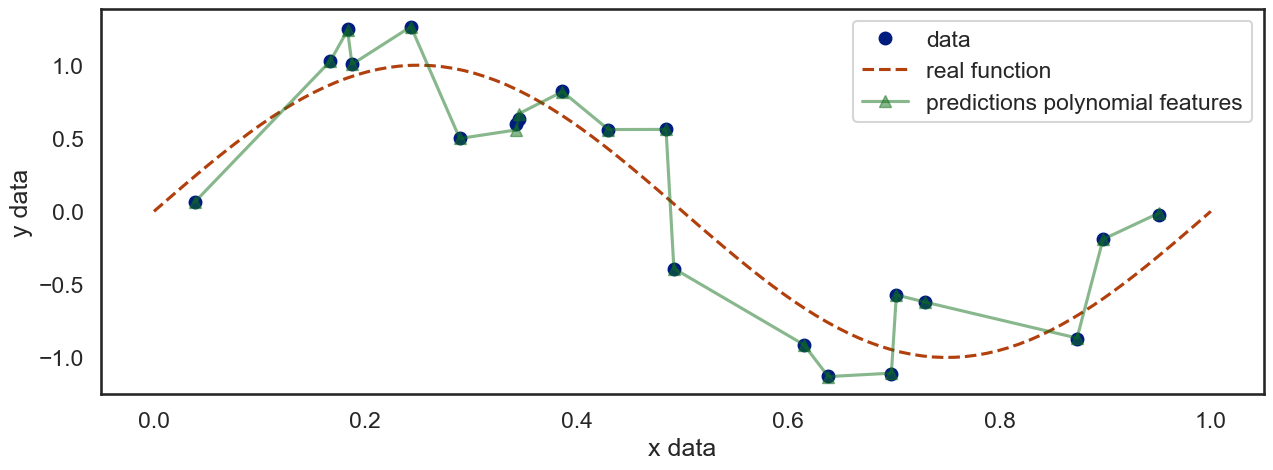

### It is Overfitting !

16.png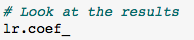

In [18]:
lr.coef_

array([[ 1.71855142e+13,  1.60946895e+07, -4.63271887e+08,
         7.63542118e+09, -8.22429192e+10,  6.19922928e+11,
        -3.39762734e+12,  1.38146104e+13, -4.19102164e+13,
         9.38962375e+13, -1.49641639e+14,  1.51732075e+14,
        -5.43643704e+13, -8.99097047e+13,  1.41715265e+14,
        -3.63882877e+13, -1.14971064e+14,  1.64509399e+14,
        -1.06491265e+14,  3.60352162e+13, -5.17349889e+12]])

array([-3.64990156e+12,  1.62291440e+07, -4.67002512e+08,  7.69471630e+09,
       -8.28609878e+10,  6.24456169e+11, -3.42198405e+12,  1.39126909e+13,
       -4.22093616e+13,  9.45870922e+13, -1.50834641e+14,  1.53227218e+14,
       -5.56499174e+13, -8.91974356e+13,  1.41323405e+14, -3.57234898e+13,
       -1.16061267e+14,  1.65570748e+14, -1.07103159e+14,  3.62324021e+13,
       -5.20114124e+12])

### Attention! The absolute values of the polynomial coefficients take on tremendous values
#### This is a sign of overfitting.
How to avoid overfitting?
The answer: Penalize the model for large values of the polynomial coefficients.

### Regularisation 
##### It is a way to reduce model complexity in order to prevent overfitting or correct an incorrectly formulated task. Usually, it is achieved by including additional information (an artificial variable) in the problem statement.

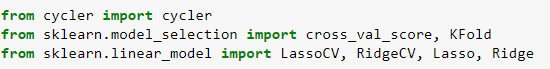

In [19]:
from cycler import cycler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LassoCV, RidgeCV, Lasso, Ridge

#### We use the Boston dataset one more time
#### The goal of the dataset is to predict the value of the houses in Boston 
#### using the given characteristics

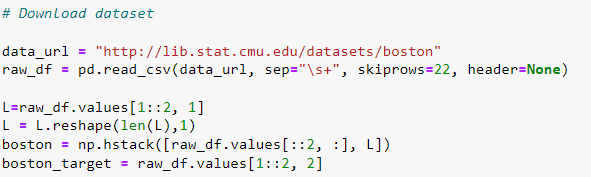

In [20]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

L = raw_df.values[1::2, 1]
L = L.reshape(len(L), 1)
boston = np.hstack([raw_df.values[::2, :], L])
boston_target = raw_df.values[1::2, 1]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_161158/1572152424.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


#### Attribute Information (in order):

CRIM     - per capita crime rate by town

ZN       - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS    - proportion of non-retail business acres per town

CHAS     - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX      - nitric oxides concentration (parts per 10 million)

RM       - average number of rooms per dwelling

AGE      - proportion of owner-occupied units built prior to 1940

DIS      - weighted distances to five Boston employment centres

RAD      - index of accessibility to radial highways

TAX      - full-value property-tax rate per \$10,000

PTRATIO  - pupil-teacher ratio by town

LSTAT    - % lower status of the population

#### Target (answer):

MEDV     - Median value of owner-occupied homes in $1000's

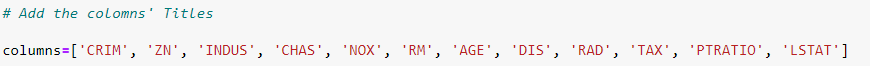

In [21]:
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']

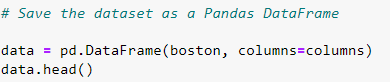

In [23]:
data = pd.DataFrame(boston, columns=columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


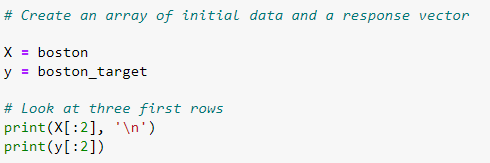

In [ ]:
X = boston
y = boston_target


print(X[:2], '\n')
print(y[:2])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 9.1400e+00]] 

[4.98 9.14]


## Lasso Regression

1.png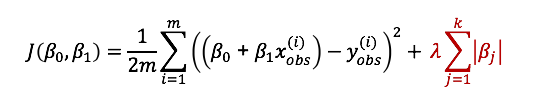

##### If $\lambda$ increases, then the complexity of the model decreases. 
##### If $\lambda$ decreases, then the risk of retraining increases.
It is needed to choose a balance.
The choice of $\lambda$  is carried out by cross-validation.

##### We will train Lasso regression with a small coefficient $\alpha$ (weak regularization)
The function Lasso uses $\alpha$, which is equivalent to $\lambda$ indicated in the equation above

24.png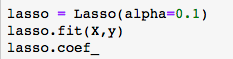

In [26]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
lasso.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.91798183e-04, -0.00000000e+00,
        0.00000000e+00,  5.32370072e-05,  0.00000000e+00,  9.96896239e-01])

array([-0.11213894,  0.04995337, -0.04913068,  1.11651918, -0.        ,
        3.54645545, -0.00781288, -1.16119235,  0.25357883, -0.01503549,
       -0.7414271 , -0.59994532])

In [25]:
# Only the coefficient at the sign of NOX (concentration of nitrogen oxides) is reset. 
# So, it is the least important for predicting the target attribute - the median value of homes in Boston.
# Also, some coefficients tend to be zero

##### We train Lasso regression with a coefficient of $\alpha$ = 10. 

25.png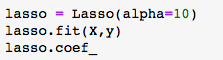

In [27]:
lasso = Lasso(alpha=10)
lasso.fit(X, y)
lasso.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.01863844, -0.        ,  0.        ,  0.0051408 ,
        0.        ,  0.69325756])

array([-0.        ,  0.02589136, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.01068632,
       -0.        , -0.58143937])

#### In this case, non-zero coefficients remained only with the signs 
 - ZN (percentage of residential areas with an area of more than 25 thousand square feet), 
 - TAX (tax level) and 
 - LSTAT (percentage of citizens with a low standard of living).

### Therefore, Lasso regression is a feature selection method

###### Create a list of different $\alpha$ to visualise the results

26.png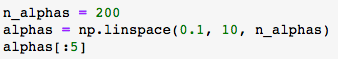

In [28]:
n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)
alphas[:5]

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497])

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497])

#### Create model and calculate the Lasso regression coefficients for various values of $\alpha$

Создайте модель и вычислите коэффициенты регрессии Лассо для различных значений $\alpha$

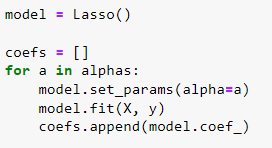

In [29]:
model = Lasso()
coefs = []
for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

###### Print the graphs of the Lasso regression coefficients for various values of $\alpha$ :

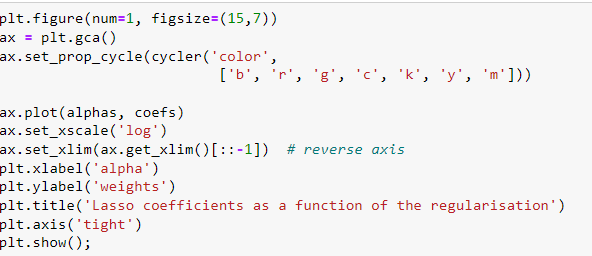

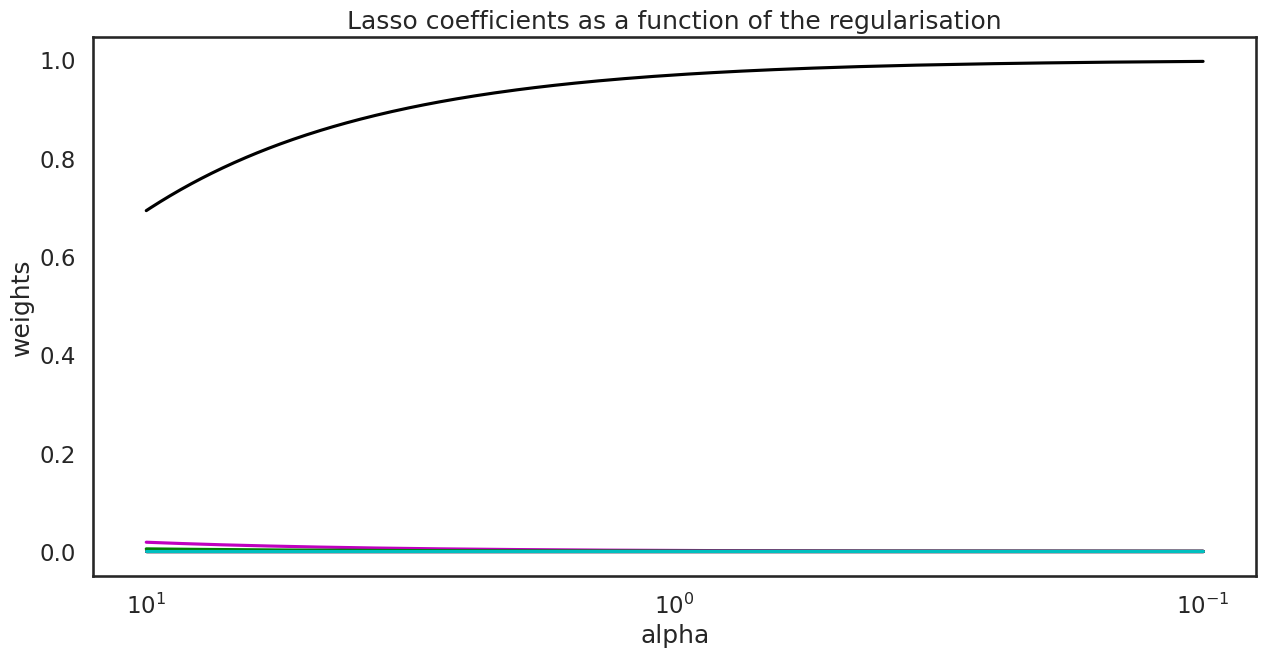

In [30]:
plt.figure(num=1, figsize=(15, 7))
ax = plt.gca()
ax.set_prop_cycle(cycler('color', ['b', 'r', 'g', 'c', 'k', 'y', 'm']))

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularisation')
plt.axis('tight')
plt.show()

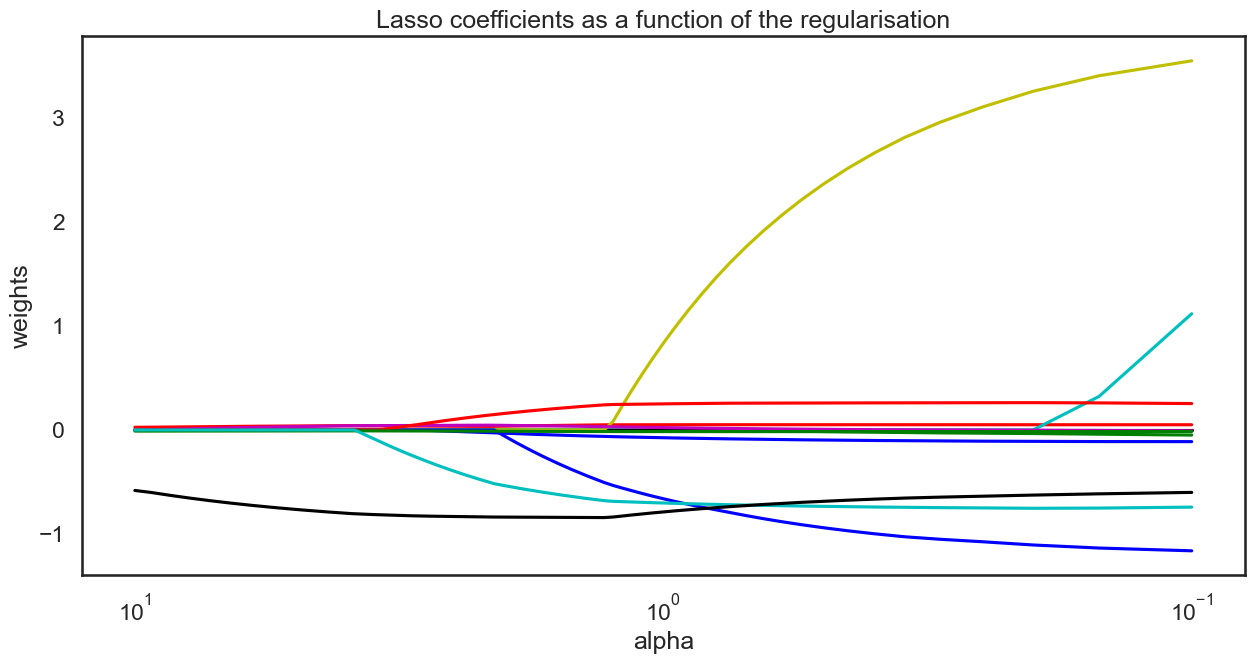

#### Determine the best value of $\alpha$  in the cross-validation process

28.png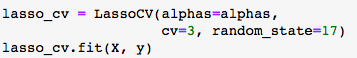

In [31]:
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17)

29.png

In [32]:
lasso_cv.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.91798183e-04, -0.00000000e+00,
        0.00000000e+00,  5.32370072e-05,  0.00000000e+00,  9.96896239e-01])

array([-0.11213894,  0.04995337, -0.04913068,  1.11651918, -0.        ,
        3.54645545, -0.00781288, -1.16119235,  0.25357883, -0.01503549,
       -0.7414271 , -0.59994532])

##### These are the optimal regularisation coefficients for the Lass regression for the optimal $\alpha$ hyperparameter :

30.png

In [33]:
lasso_cv.alpha_

np.float64(0.1)

0.1

## Ridge Regression

3.png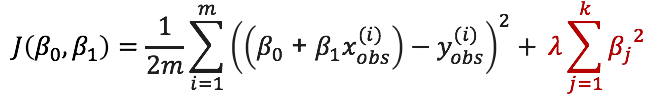

Sklearn implements a [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) class for cross-validation with Ridge regression.

create a sequence of hyperparameter $\alpha$ = $\lambda$ for training Ridge regression with cross-validation

31.png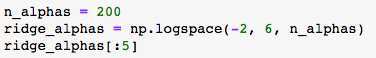

In [34]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
ridge_alphas[:5]

array([0.01      , 0.01096986, 0.01203378, 0.01320088, 0.01448118])

array([0.01      , 0.01096986, 0.01203378, 0.01320088, 0.01448118])

32.png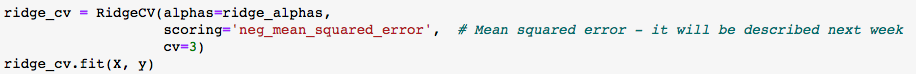

In [35]:
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring='neg_mean_squared_error', cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

33.png

In [36]:
ridge_cv.coef_

array([ 1.26485658e-07,  1.58720360e-08,  1.12860584e-07, -1.30694105e-06,
        6.87063905e-06, -4.88226356e-06,  9.85827392e-08,  1.87376066e-07,
        7.01394645e-08, -9.43985264e-10,  1.18004615e-07,  9.99998885e-01])

array([-0.11451143,  0.05549706, -0.06143485,  0.49146696, -0.17920105,
        1.87051703,  0.00744056, -1.09955112,  0.30458852, -0.01667159,
       -0.80728253, -0.7116022 ])

#### In the case of Ridge regression, no parameters are equal to zero.
#### They can be minimal, but not zero !

##### These are the optimal regularisation coefficients for the Ridge regression for the optimal $\alpha$ hyperparameter :

34.png

In [37]:
ridge_cv.alpha_

np.float64(0.01)

151.6716888470924

Create the mosel and calculate the Ridge regression coefficients for various values of $\alpha$ of $\alpha$

Создайте модель и вычислите коэффициенты регрессии Ridge для различных значений $\alpha$

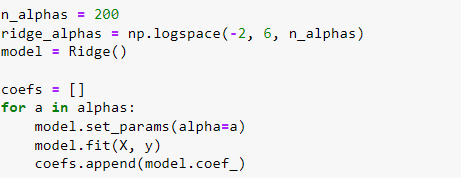

In [38]:
n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)
model = Ridge()

coefs = []

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X, y)
    coefs.append(model.coef_)

###### Print the graphs of the Ridge regression coefficients for various values of $\alpha$ :

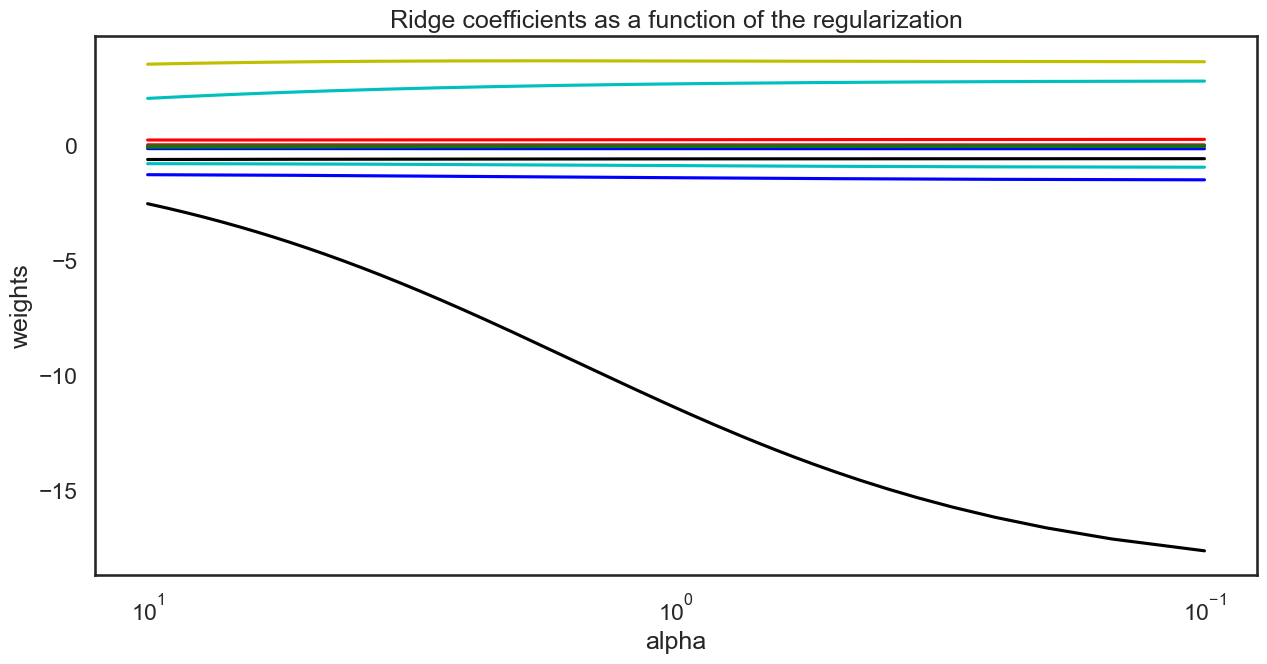

### Graphic meaning of Ridge regularisation

4.png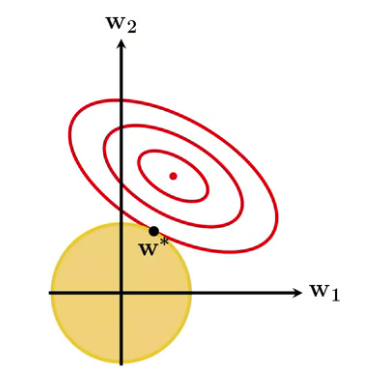

Where w = $\beta$

In [39]:
# The red lines are the level lines of the convex error functional (see the Ridge regression formula).
# Without the regularizer, a regression looks for a minimum (extremum). This is the point in the centre.
# Ridge regression (with the regularizer) has the additional condition to introduce that the solution 
# should be inside a circular region centred at zero.
# In the regularizer case, we are looking for solution, which is located inside this circular 
# region and as close as possible to the extremum.

### Let's go back to the sine function and compare visually 
 - linear regression
 - Lasso regression
 - Ridge regression

#### Polynomial hyperparameters are for Ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 

36.png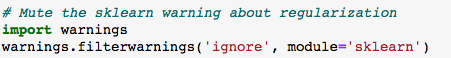

In [39]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

37.png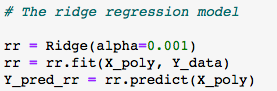

In [40]:
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

38.png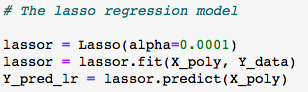

In [41]:
lassor = Lasso(alpha=0.0001)
lassor.fit(X_poly, Y_data)
Y_pred_rr = lassor.predict(X_poly)

39.png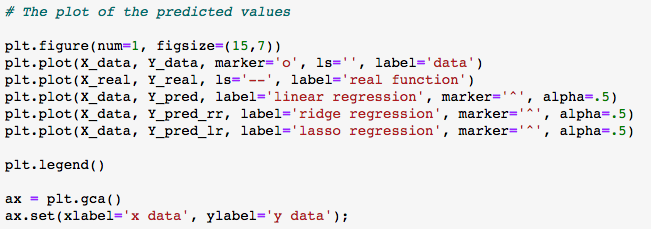

[Text(0.5, 0, 'x'), Text(0, 0.5, 'y data')]

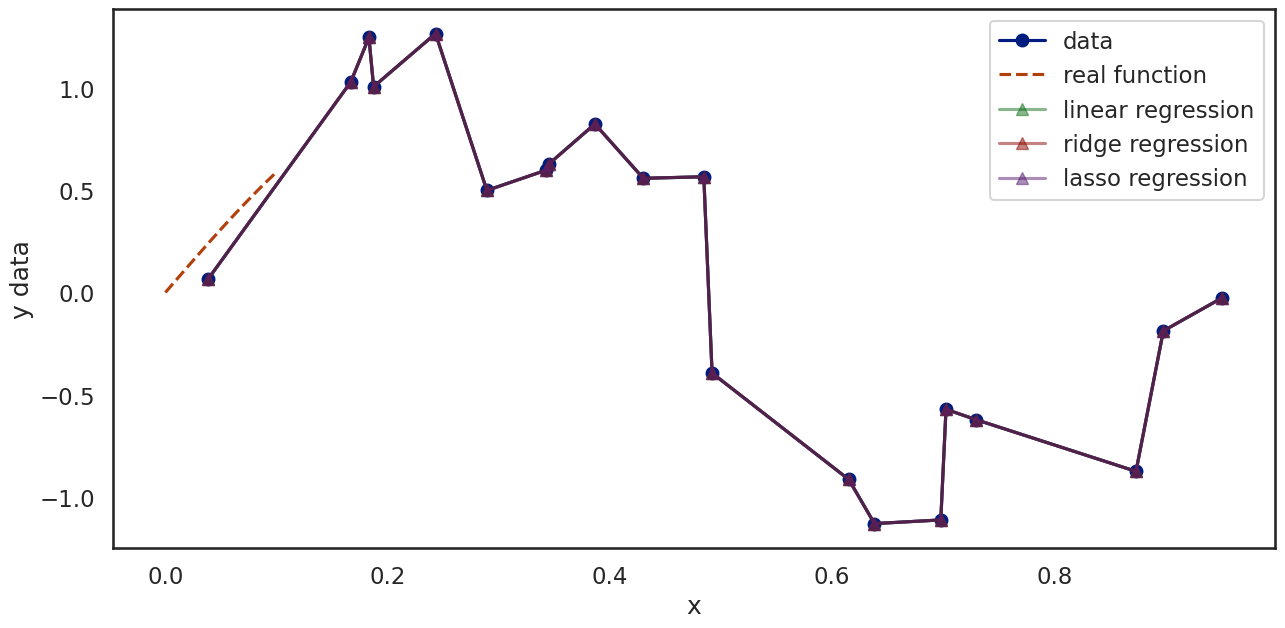

In [42]:
plt.figure(num=1, figsize=(15, 7))
plt.plot(X_data, Y_data, marker='o', ls='-', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_data, marker='^', ls='-', label='linear regression', alpha=.5)
plt.plot(X_data, Y_data, marker='^', ls='-', label='ridge regression', alpha=.5)
plt.plot(X_data, Y_data, marker='^', ls='-', label='lasso regression', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x', ylabel='y data')

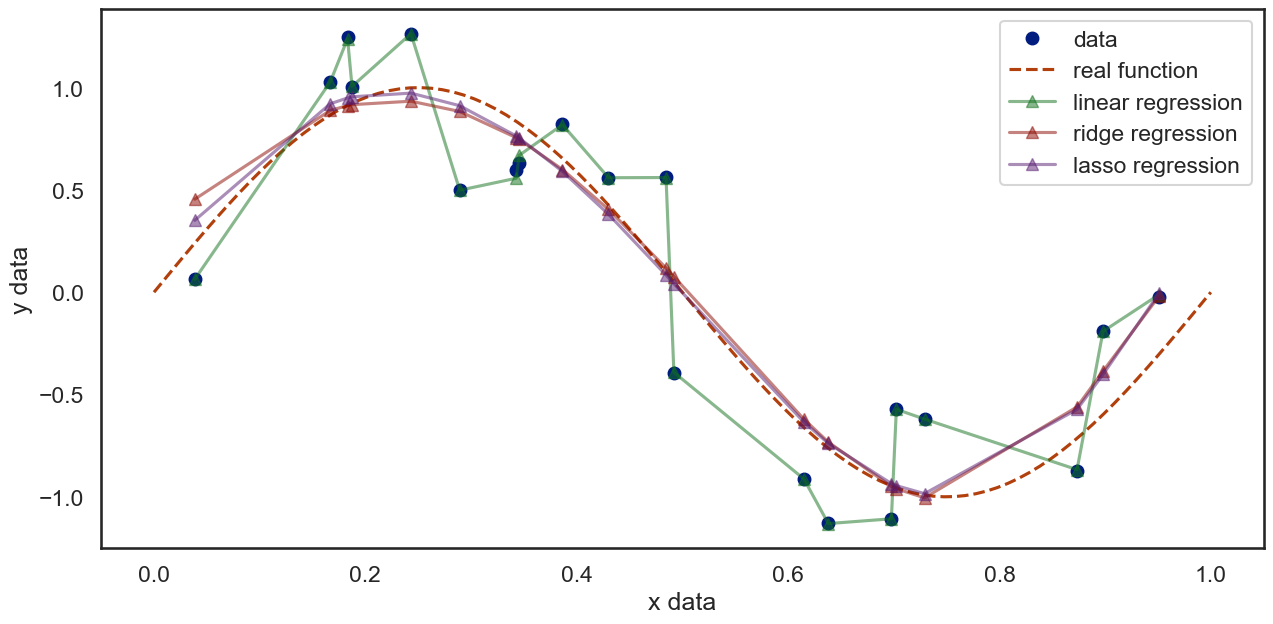

42.png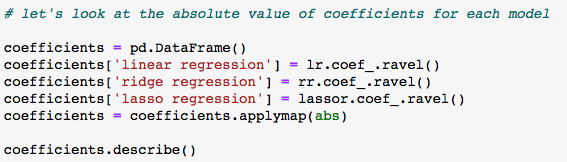

In [43]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()

/tmp/ipykernel_161158/2397426140.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  coefficients = coefficients.applymap(abs)


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.818316e+13,2.169397,2.167284
std,5.949345e+13,2.900278,4.706731
min,1.609469e+07,0.000000,0.000000
25%,3.397627e+12,0.467578,0.000000
50%,3.638829e+13,1.017272,0.252181
75%,1.064913e+14,2.883507,1.641353
max,1.645094e+14,12.429635,20.176708


,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.783911e+13,2.169397,2.167284
std,6.038244e+13,2.900278,4.706731
min,1.622914e+07,0.000000,0.000000
25%,3.421984e+12,0.467578,0.000000
50%,3.623240e+13,1.017272,0.252181
75%,1.071032e+14,2.883507,1.641353
max,1.655707e+14,12.429635,20.176708


##### There is a huge difference in scale between non-regularised vs regularised regression.

43.png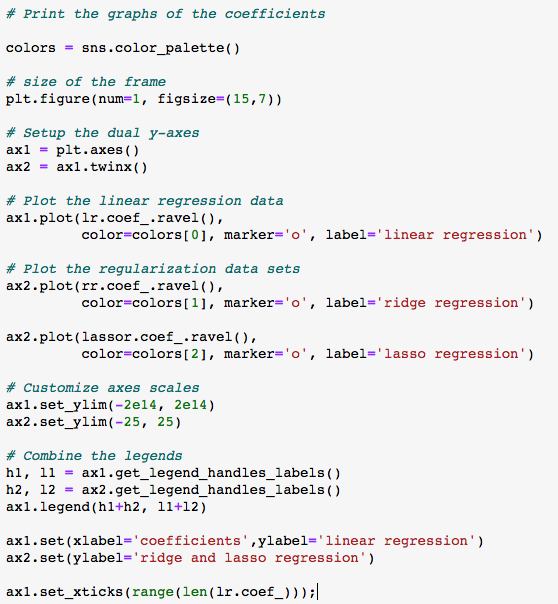

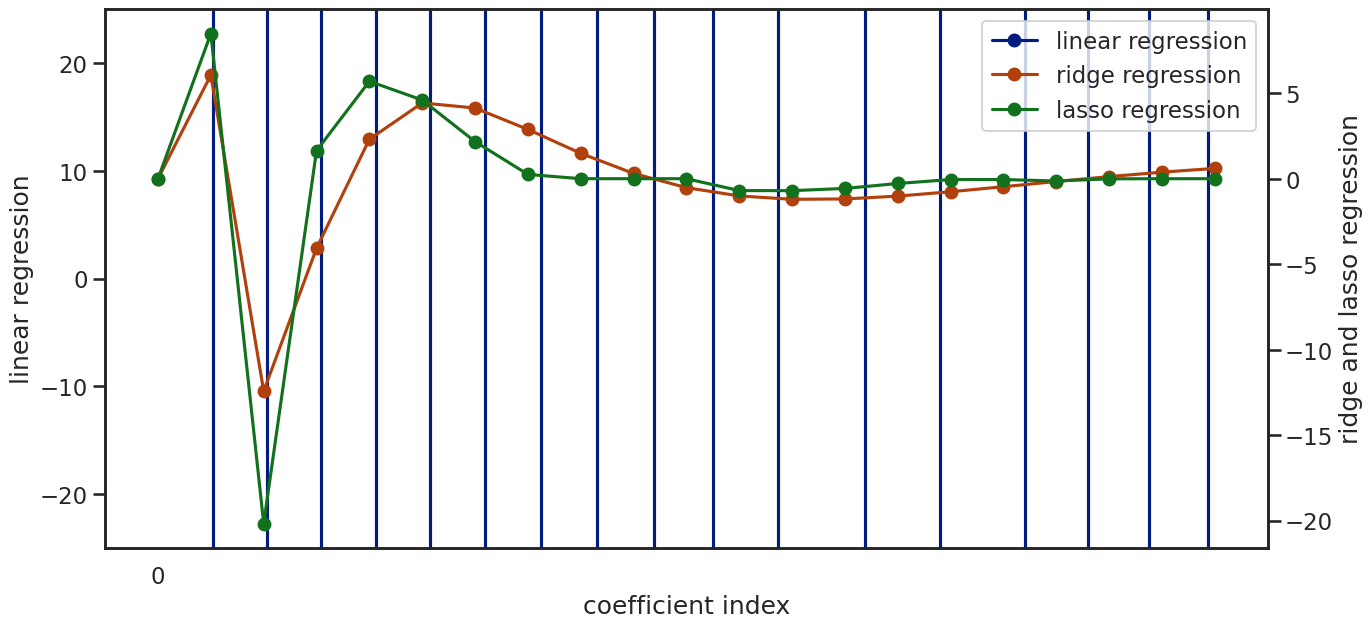

In [45]:
colors = sns.color_palette()
plt.figure(num=1, figsize=(15, 7))

ax1 = plt.axes()
ax2 = ax1.twinx()

ax1.plot(lr.coef_.ravel(), color=colors[0], marker='o', label='linear regression')
ax2.plot(rr.coef_.ravel(), color=colors[1], marker='o', label='ridge regression')
ax2.plot(lassor.coef_.ravel(), color=colors[2], marker='o', label='lasso regression')

ax1.set_ylim(-2e14, 2e14)
ax1.set_ylim(-25, 25)


h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficient index', ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')


ax1.set_xticks(range(len(lr.coef_)))

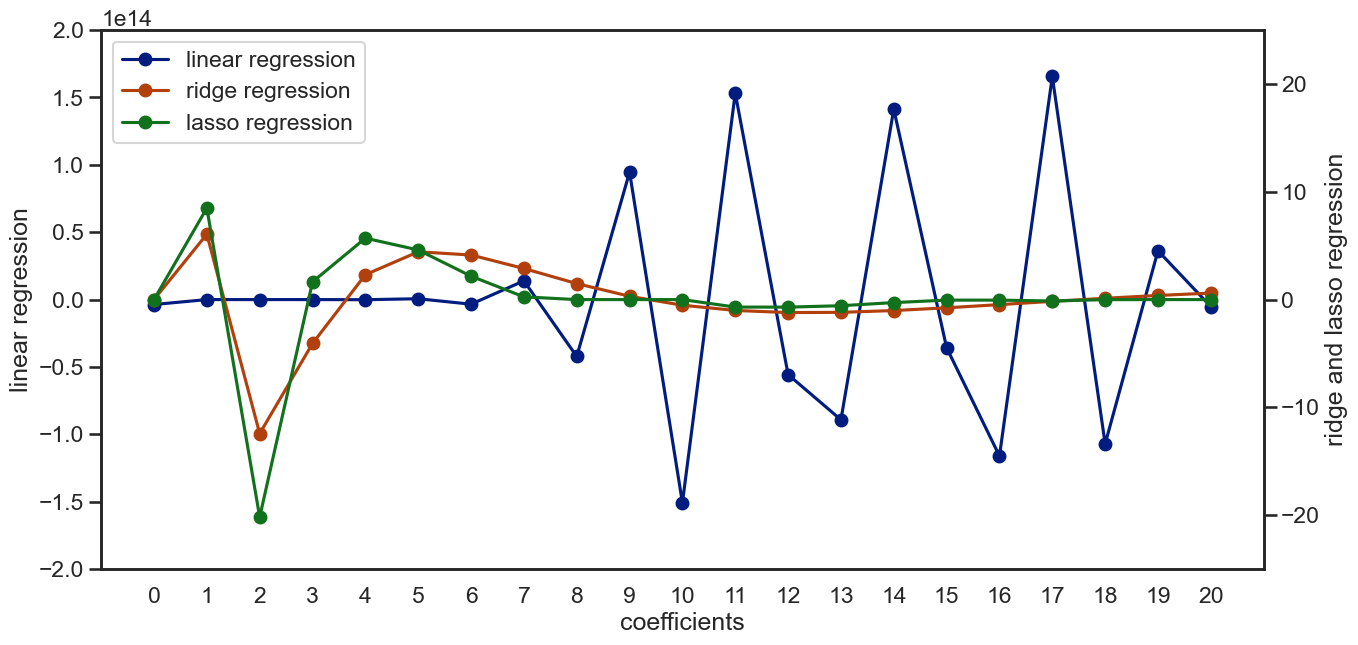

<html> <h3 style="font-style:italic; color:#FF0000;"> Try Out: 
Train the model with Elastic Net regression using cross-validation using function ElasticNetCV.
Find the optimal coefficients and the optimal hyperparameter.
Build the graph of the coefficients. </h3> </html>

40.png

In [46]:
from sklearn.linear_model import ElasticNetCV